In [1]:
import tensorflow as tf
from sklearn import datasets
from tensorflow.keras import layers
from tensorflow import keras
from keras import Model


import sys
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
%matplotlib inline

## Create synthetic data for regression

(100000, 2)


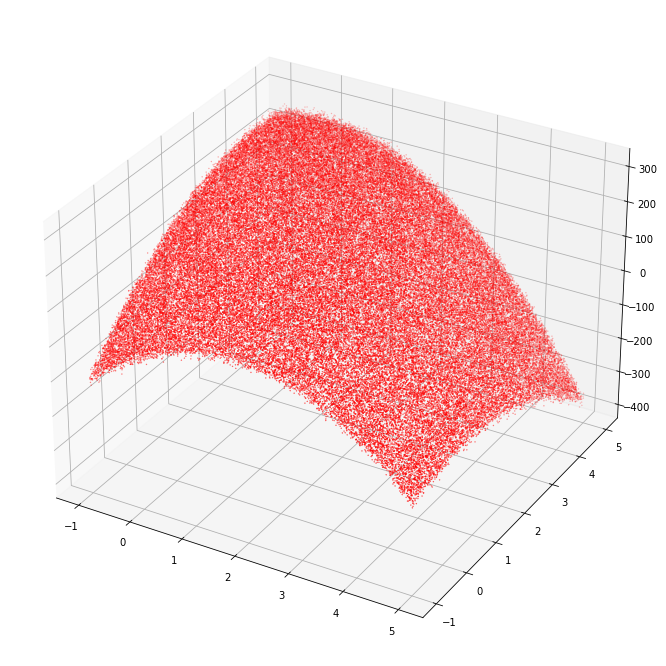

In [2]:
from sklearn import preprocessing

np.random.seed(2021)
n = 100000

# uniform distribution in the range (-1, 5)
x = np.random.rand(n, 2) * 6 - 1
print (x.shape)

# broadcasting
y = - 24 * x[:,0] ** 2 - 12 * x[:,1] ** 2 - 15 * x[:,0] * x[:,1] + 70 * x[:,0] + 90 * x[:,1] + 10 * np.random.randn(n) + 100

fig = plt.figure(figsize=(15, 12))
ax = fig.gca(projection = '3d')
ax.scatter(x[:,0], x[:,1], y, color='red', s=0.1)
plt.show()

## Setting up the NN

In [3]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=2021)
#add normalization
norm = tf.keras.layers.experimental.preprocessing.Normalization()
norm.adapt(x_train)

In [4]:
model_wide = tf.keras.Sequential()
model_wide.add(norm)
model_wide.add(layers.Dense(24, activation='relu', input_shape=(2,)))
model_wide.add(layers.Dense(units=1, name='Output'))                              
model_wide.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 2)                 5         
_________________________________________________________________
dense (Dense)                (None, 24)                72        
_________________________________________________________________
Output (Dense)               (None, 1)                 25        
Total params: 102
Trainable params: 97
Non-trainable params: 5
_________________________________________________________________


In [5]:
model_wide_elu = tf.keras.Sequential()
model_wide_elu.add(norm)
model_wide_elu.add(layers.Dense(24, activation='elu', input_shape=(2,)))
model_wide_elu.add(layers.Dense(units=1, name='Output'))                              
model_wide_elu.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 2)                 5         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                72        
_________________________________________________________________
Output (Dense)               (None, 1)                 25        
Total params: 102
Trainable params: 97
Non-trainable params: 5
_________________________________________________________________


In [6]:
model_deep = tf.keras.Sequential()
model_deep.add(norm)
model_deep.add(layers.Dense(3, activation='relu', input_shape=(2,)))
model_deep.add(layers.Dense(3, activation='relu'))
model_deep.add(layers.Dense(3, activation='relu'))
model_deep.add(layers.Dense(3, activation='relu'))
model_deep.add(layers.Dense(3, activation='relu'))
model_deep.add(layers.Dense(3, activation='relu'))
model_deep.add(layers.Dense(3, activation='relu'))
model_deep.add(layers.Dense(3, activation='relu'))
model_deep.add(layers.Dense(units=1, name='Output'))                              
model_deep.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 2)                 5         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

In [7]:
model_deep_drop = tf.keras.Sequential()
model_deep_drop.add(norm)
model_deep_drop.add(layers.Dense(3, activation='relu', input_shape=(2,)))
model_deep_drop.add(layers.Dense(3, activation='relu'))
model_deep_drop.add(layers.Dropout(0.2))
model_deep_drop.add(layers.Dense(3, activation='relu'))
model_deep_drop.add(layers.Dropout(0.1))
model_deep_drop.add(layers.Dense(3, activation='relu'))
model_deep_drop.add(layers.Dropout(0.1))
model_deep_drop.add(layers.Dense(3, activation='relu'))
model_deep_drop.add(layers.Dropout(0.1))
model_deep_drop.add(layers.Dense(3, activation='relu'))
model_deep_drop.add(layers.Dropout(0.1))
model_deep_drop.add(layers.Dense(3, activation='relu'))
model_deep_drop.add(layers.Dropout(0.1))
model_deep_drop.add(layers.Dense(3, activation='relu'))
model_deep_drop.add(layers.Dropout(0.2))
model_deep_drop.add(layers.Dense(units=1, name='Output'))                              
model_deep_drop.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 2)                 5         
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 12        
_________________________________________________________________
dropout (Dropout)            (None, 3)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 12        
_________________________________________________________________
dropout_1 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_13 (Dense)             (None, 3)                

In [8]:
model_deep_elu = tf.keras.Sequential()
model_deep_elu.add(norm)
model_deep_elu.add(layers.Dense(3, activation='elu', input_shape=(2,)))
model_deep_elu.add(layers.Dense(3, activation='elu'))
model_deep_elu.add(layers.Dense(3, activation='elu'))
model_deep_elu.add(layers.Dense(3, activation='elu'))
model_deep_elu.add(layers.Dense(3, activation='elu'))
model_deep_elu.add(layers.Dense(3, activation='elu'))
model_deep_elu.add(layers.Dense(3, activation='elu'))
model_deep_elu.add(layers.Dense(3, activation='elu'))
model_deep_elu.add(layers.Dense(units=1, name='Output'))                              
model_deep_elu.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 2)                 5         
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_22 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_23 (Dense)             (None, 3)                

In [9]:
model_wide.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
model_wide_elu.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
model_deep.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
model_deep_drop.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
model_deep_elu.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

## Wide NN with Relu activation

In [10]:
epochs = 10
batch_size = 32
history = model_wide.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=1,)

Epoch 1/10
2500/2500 [==============================] - 6s 2ms/step - loss: 21608.8707 - val_loss: 6448.1592
Epoch 2/10
2500/2500 [==============================] - 4s 2ms/step - loss: 5445.8675 - val_loss: 3221.3635
Epoch 3/10
2500/2500 [==============================] - 4s 2ms/step - loss: 2642.3359 - val_loss: 1617.1357
Epoch 4/10
2500/2500 [==============================] - 4s 2ms/step - loss: 1449.6555 - val_loss: 1257.2267
Epoch 5/10
2500/2500 [==============================] - 5s 2ms/step - loss: 1223.0572 - val_loss: 1150.1497
Epoch 6/10
2500/2500 [==============================] - 4s 2ms/step - loss: 1105.5817 - val_loss: 977.1283
Epoch 7/10
2500/2500 [==============================] - 5s 2ms/step - loss: 908.5193 - val_loss: 708.0449
Epoch 8/10
2500/2500 [==============================] - 5s 2ms/step - loss: 650.8254 - val_loss: 541.6876
Epoch 9/10
2500/2500 [==============================] - 4s 2ms/step - loss: 528.5509 - val_loss: 499.1361
Epoch 10/10
2500/2500 [===========

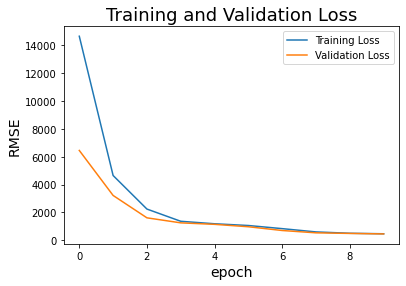

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('RMSE', fontsize=14)
plt.title('Training and Validation Loss', fontsize=18)
plt.xlabel('epoch', fontsize=14)
plt.show()

In [12]:
model_wide.evaluate(x_test, y_test)

625/625 [==============================] - 1s 968us/step - loss: 463.6056


463.6055603027344

## Wide NN with Elu activation 

In [13]:
history = model_wide_elu.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=1,)

Epoch 1/10
2500/2500 [==============================] - 5s 2ms/step - loss: 22124.1320 - val_loss: 5088.7954
Epoch 2/10
2500/2500 [==============================] - 4s 2ms/step - loss: 4120.1342 - val_loss: 2153.4221
Epoch 3/10
2500/2500 [==============================] - 4s 2ms/step - loss: 1817.7298 - val_loss: 1348.9064
Epoch 4/10
2500/2500 [==============================] - 4s 2ms/step - loss: 1268.0926 - val_loss: 1035.3867
Epoch 5/10
2500/2500 [==============================] - 5s 2ms/step - loss: 868.0000 - val_loss: 558.2370
Epoch 6/10
2500/2500 [==============================] - 4s 2ms/step - loss: 513.6701 - val_loss: 461.3061
Epoch 7/10
2500/2500 [==============================] - 4s 2ms/step - loss: 449.2247 - val_loss: 444.1961
Epoch 8/10
2500/2500 [==============================] - 4s 2ms/step - loss: 432.4354 - val_loss: 437.1045
Epoch 9/10
2500/2500 [==============================] - 4s 2ms/step - loss: 429.7375 - val_loss: 429.5298
Epoch 10/10
2500/2500 [==============

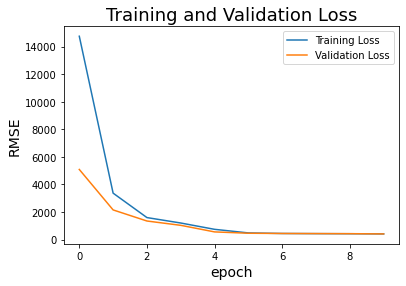

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('RMSE', fontsize=14)
plt.title('Training and Validation Loss', fontsize=18)
plt.xlabel('epoch', fontsize=14)
plt.show()

In [15]:
model_wide_elu.evaluate(x_test, y_test)

625/625 [==============================] - 1s 978us/step - loss: 412.1559


412.1558532714844

Wide NN with Relu and Elu have similar performance.

## Deep NN with Relu activation

In [16]:
epochs = 10
batch_size = 32
history = model_deep.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
2500/2500 [==============================] - 11s 4ms/step - loss: 28799.2929 - val_loss: 28463.7734
Epoch 2/10
2500/2500 [==============================] - 10s 4ms/step - loss: 28184.2540 - val_loss: 27954.2715
Epoch 3/10
2500/2500 [==============================] - 10s 4ms/step - loss: 27843.1616 - val_loss: 27460.0938
Epoch 4/10
2500/2500 [==============================] - 10s 4ms/step - loss: 27249.3056 - val_loss: 26977.3594
Epoch 5/10
2500/2500 [==============================] - 10s 4ms/step - loss: 26847.8149 - val_loss: 26507.3340
Epoch 6/10
2500/2500 [==============================] - 10s 4ms/step - loss: 26285.1030 - val_loss: 26049.6426
Epoch 7/10
2500/2500 [==============================] - 10s 4ms/step - loss: 25990.6970 - val_loss: 25602.8770
Epoch 8/10
2500/2500 [==============================] - 10s 4ms/step - loss: 25369.2563 - val_loss: 25168.7773
Epoch 9/10
2500/2500 [==============================] - 10s 4ms/step - loss: 24865.0782 - val_loss: 24747.0020
E

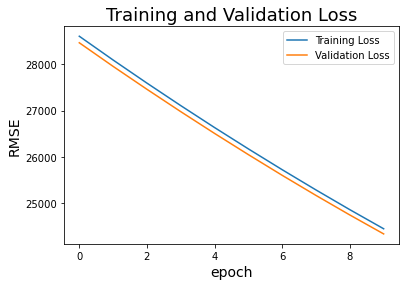

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('RMSE', fontsize=14)
plt.title('Training and Validation Loss', fontsize=18)
plt.xlabel('epoch', fontsize=14)
plt.show()

In [18]:
model_deep.evaluate(x_test, y_test)

625/625 [==============================] - 1s 2ms/step - loss: 24338.4160


24338.416015625

## Deep NN with Relu activation and dropout

In [19]:
history = model_deep_drop.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=1,)

Epoch 1/10
2500/2500 [==============================] - 14s 5ms/step - loss: 25865.9891 - val_loss: 18758.9863
Epoch 2/10
2500/2500 [==============================] - 13s 5ms/step - loss: 21056.3432 - val_loss: 18441.3105
Epoch 3/10
2500/2500 [==============================] - 13s 5ms/step - loss: 20555.1461 - val_loss: 18238.6816
Epoch 4/10
2500/2500 [==============================] - 13s 5ms/step - loss: 20164.3910 - val_loss: 18025.8770
Epoch 5/10
2500/2500 [==============================] - 13s 5ms/step - loss: 19860.0548 - val_loss: 17960.5234
Epoch 6/10
2500/2500 [==============================] - 13s 5ms/step - loss: 19618.2234 - val_loss: 17891.9785
Epoch 7/10
2500/2500 [==============================] - 13s 5ms/step - loss: 19380.0379 - val_loss: 17840.7051
Epoch 8/10
2500/2500 [==============================] - 13s 5ms/step - loss: 19329.4277 - val_loss: 17795.8340
Epoch 9/10
2500/2500 [==============================] - 13s 5ms/step - loss: 19216.3088 - val_loss: 17704.3164
E

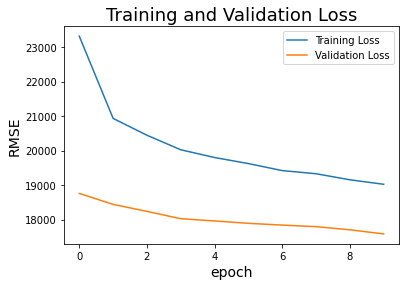

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('RMSE', fontsize=14)
plt.title('Training and Validation Loss', fontsize=18)
plt.xlabel('epoch', fontsize=14)
plt.show()

In [21]:
model_deep_drop.evaluate(x_test, y_test)

625/625 [==============================] - 1s 2ms/step - loss: 17585.1895


17585.189453125

## Deep NN with Elu activation

In [22]:
history = model_deep_elu.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=1,)

Epoch 1/10
2500/2500 [==============================] - 11s 4ms/step - loss: 15369.5795 - val_loss: 3721.3860
Epoch 2/10
2500/2500 [==============================] - 10s 4ms/step - loss: 3453.9687 - val_loss: 3398.3345
Epoch 3/10
2500/2500 [==============================] - 10s 4ms/step - loss: 3140.0736 - val_loss: 1818.1108
Epoch 4/10
2500/2500 [==============================] - 10s 4ms/step - loss: 1026.3855 - val_loss: 353.2902
Epoch 5/10
2500/2500 [==============================] - 10s 4ms/step - loss: 294.4048 - val_loss: 218.1814
Epoch 6/10
2500/2500 [==============================] - 10s 4ms/step - loss: 214.3873 - val_loss: 200.3860
Epoch 7/10
2500/2500 [==============================] - 10s 4ms/step - loss: 195.3137 - val_loss: 187.2980
Epoch 8/10
2500/2500 [==============================] - 10s 4ms/step - loss: 184.6631 - val_loss: 179.8201
Epoch 9/10
2500/2500 [==============================] - 10s 4ms/step - loss: 179.7665 - val_loss: 173.6478
Epoch 10/10
2500/2500 [======

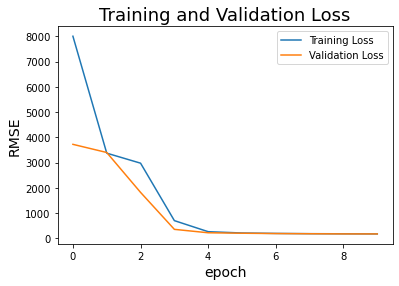

In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('RMSE', fontsize=14)
plt.title('Training and Validation Loss', fontsize=18)
plt.xlabel('epoch', fontsize=14)
plt.show()

In [24]:
model_deep_elu.evaluate(x_test, y_test)

625/625 [==============================] - 1s 2ms/step - loss: 172.7493


172.74932861328125

The use of Elu activation function does help considerably in eliminating the vanishing gradient problem, but the final performance is largely similar to the wide NN with Relu activation function.

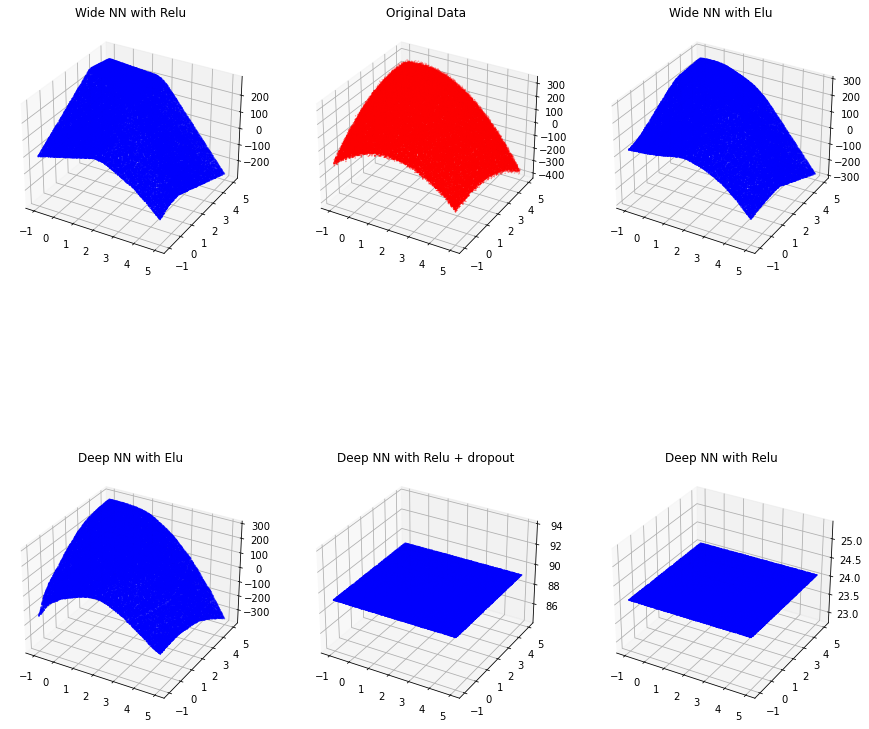

In [36]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(231, projection='3d')
ax.scatter(x[:,0], x[:,1], model_wide.predict(x), color='blue', s=0.1)
ax.set_title("Wide NN with Relu")
ax2 = fig.add_subplot(232, projection='3d')
ax2.scatter(x[:,0], x[:,1], y, color='red', s=0.1)
ax2.set_title("Original Data")
ax3 = fig.add_subplot(236, projection='3d')
ax3.scatter(x[:,0], x[:,1], model_deep.predict(x), color='blue', s=0.1)
ax3.set_title("Deep NN with Relu")
ax4 = fig.add_subplot(234, projection='3d')
ax4.scatter(x[:,0], x[:,1], model_deep_elu.predict(x), color='blue', s=0.1)
ax4.set_title("Deep NN with Elu")
ax5 = fig.add_subplot(235, projection='3d')
ax5.scatter(x[:,0], x[:,1], model_deep_drop.predict(x), color='blue', s=0.1)
ax5.set_title("Deep NN with Relu + dropout")
ax6 = fig.add_subplot(233, projection='3d')
ax6.scatter(x[:,0], x[:,1], model_wide_elu.predict(x), color='blue', s=0.1)
ax6.set_title("Wide NN with Elu")
plt.show()